<a href="https://colab.research.google.com/github/thisisanuragn/ANURAG-N/blob/main/AnuragN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study on Regression
The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Year', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

Visualize the Data

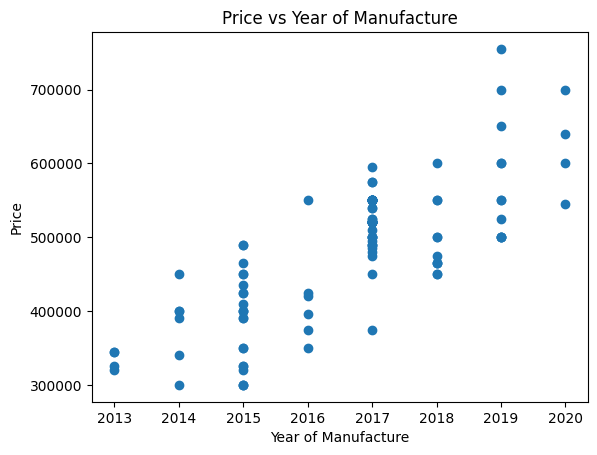

In [4]:
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.title('Price vs Year of Manufacture')
plt.show()

Preparing Data for Modeling

In [6]:
from sklearn.model_selection import train_test_split

X = data[['Year']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on testing data
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and R^2 score
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R^2:", linear_model.score(X_test, y_test))

Linear Regression MSE: 3300622013.458548
Linear Regression R^2: 0.5426152630717009


Lasso Regression Model

In [8]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_model.fit(X_train, y_train)

# Predict on testing data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MSE and R^2 score
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R^2:", lasso_model.score(X_test, y_test))

Lasso Regression MSE: 3300623363.7017994
Lasso Regression R^2: 0.5426150759613162


Prediction for a 2022 Model

In [9]:
year_2022 = [[2022]]
predicted_price_2022 = linear_model.predict(year_2022) if mse_linear < mse_lasso else lasso_model.predict(year_2022)
print(f"Predicted price for 2022 Hyundai Grand i10: ${predicted_price_2022[0]:.2f}")


Predicted price for 2022 Hyundai Grand i10: $706492.63


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
